# Data Analysis : Air Quality Public Dataset
- Nama:   Suninda Dimas Alfarisi
- Email: dimasbrantas10@gmail.com
- ID Dicoding: suninda_dimas

## Menentukan Pertanyaan Bisnis

1. Apakah perkembangan tren kualitas udara dari tahun 2013 s/d 2017 mengelami penurunan atau peningkatan?
2. Bagaimana dengan kualitas udara pada waktu malam hari apakah baik untuk beraktivitas?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

sns.set_style("whitegrid")

## 1.) Data Wrangling

Proses ini akan melakukan beberapa tahap untuk mempersiapkan data yang berkualitas sebelum melakukan Exploration Data
- Gathering Data
- Assessing Data
- Cleaning Data

### 1.1 ) Gathering Data

In [2]:
Aotizhongxin = pd.read_csv('Dataset/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
Changping = pd.read_csv('Dataset/PRSA_Data_Changping_20130301-20170228.csv')
Dingling = pd.read_csv('Dataset/PRSA_Data_Dingling_20130301-20170228.csv')
Dongsi = pd.read_csv('Dataset/PRSA_Data_Dongsi_20130301-20170228.csv')
Guanyuan = pd.read_csv('Dataset/PRSA_Data_Guanyuan_20130301-20170228.csv')
Gucheng = pd.read_csv('Dataset/PRSA_Data_Gucheng_20130301-20170228.csv')
Huairou = pd.read_csv('Dataset/PRSA_Data_Huairou_20130301-20170228.csv')
Nongzhanguan = pd.read_csv('Dataset/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
Shunyi = pd.read_csv('Dataset/PRSA_Data_Shunyi_20130301-20170228.csv')
Tiantan = pd.read_csv('Dataset/PRSA_Data_Tiantan_20130301-20170228.csv')
Wanliu = pd.read_csv('Dataset/PRSA_Data_Wanliu_20130301-20170228.csv')
Wanshouxigong = pd.read_csv('Dataset/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

data = {'aotizhongxin': Aotizhongxin,
        'changping': Changping,
        'dingling': Dingling,
        'congsi': Dongsi,
        'guanyuan': Guanyuan,
        'gucheng': Gucheng,
        'huairou': Huairou,
        'nongzhanguan': Nongzhanguan,
        'shunyi': Shunyi,
        'tiantan': Tiantan,
        'wanliu': Wanliu,
        'wanshouxigong': Wanshouxigong}

## Deskripsi setiap kolom
1. PM2.5: Partikel materi (particulate matter) dengan diameter 2.5 mikron atau lebih kecil. Partikel ini berbahaya bagi kesehatan karena dapat masuk ke paru-paru dan menyebabkan berbagai masalah pernapasan.

2. PM10: Partikel materi dengan diameter 10 mikron atau lebih kecil. Partikel ini berbahaya bagi kesehatan karena dapat masuk ke paru-paru dan menyebabkan berbagai masalah pernapasan.

3. SO2: Sulfur dioksida, gas yang dihasilkan dari pembakaran bahan bakar fosil seperti batubara dan minyak bumi. Gas ini dapat menyebabkan iritasi pada mata, hidung, dan tenggorokan.

4. NO2: Nitrogen dioksida, gas yang dihasilkan dari pembakaran bahan bakar fosil dan asap kendaraan. Gas ini dapat menyebabkan iritasi pada paru-paru dan memperburuk asma.

5. CO: Karbon monoksida, gas beracun yang dihasilkan dari pembakaran tidak sempurna. Gas ini dapat mengikat hemoglobin dalam darah dan mengurangi kemampuannya membawa oksigen.

6. O3: Ozon, gas yang terbentuk di atmosfer melalui reaksi kimia antara polutan lain. Gas ini dapat menyebabkan iritasi pada mata, hidung, dan tenggorokan.

7. TEMP: Suhu udara dalam derajat Celcius.

8. PRES: Tekanan udara dalam milibar.

9. DEWP: Titik embun, suhu di mana uap air di udara mengembun menjadi air.

10. RAIN: Curah hujan dalam milimeter.

11. wd: Arah angin (dari mana angin bertiup).

12. WSPM: Kecepatan angin dalam meter per detik.

13. Station: Nama stasiun pemantauan kualitas udara.

In [3]:
Aotizhongxin.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
Changping.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [5]:
Dingling.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [6]:
Dongsi.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [7]:
Guanyuan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [8]:
Gucheng.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [9]:
Huairou.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [10]:
Nongzhanguan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [11]:
Shunyi.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [12]:
Tiantan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [13]:
Wanliu.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [14]:
Wanshouxigong.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


### 1.2) Assessing Data

Dalam tahap ini yaitu mengecek kualitas data sebelum melakukan perform Outline yang di paparkan adalah: 
- Checking data types
- Checking missing values
- Checking duplicates

1.2.1) Checking data types

In [15]:
for data_nm, df in data.items():
    print(f"\n,{data[data_nm].info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB

,None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entri

1.2.2) Check Missing Values

In [16]:
for df_name, df in data.items():
    print(df_name, "\n" ,data[df_name].isnull().sum(), "\n")

aotizhongxin 
 No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64 

changping 
 No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64 

dingling 
 No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64 

congsi 
 No            0
year          0
month       

In [17]:
for df_name, df in data.items():
    total_data = df.shape[0]  # Jumlah total baris dalam dataframe
    missing_values_count = data[df_name].isnull().sum()
    percentage_missing = (missing_values_count / total_data) * 100
    print(f"DataFrame: {df_name}")
    print(f"Percentage of missing values:")
    print(percentage_missing)
    print("\n")


DataFrame: aotizhongxin
Percentage of missing values:
No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.638033
PM10       2.047684
SO2        2.666553
NO2        2.917522
CO         5.065024
O3         4.902464
TEMP       0.057039
PRES       0.057039
DEWP       0.057039
RAIN       0.057039
wd         0.231006
WSPM       0.039927
station    0.000000
dtype: float64


DataFrame: changping
Percentage of missing values:
No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.207392
PM10       1.659822
SO2        1.791011
NO2        1.902236
CO         4.337782
O3         1.722564
TEMP       0.151152
PRES       0.142596
DEWP       0.151152
RAIN       0.145448
wd         0.399270
WSPM       0.122633
station    0.000000
dtype: float64


DataFrame: dingling
Percentage of missing values:
No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       

1.2.3) Check Duplicates Data

In [18]:
count_duplicate = {}
data_length = {}
for df_name, df in data.items():
    count_duplicate[df_name] = df.duplicated().sum()
    data_length[df_name] = df.shape[0]

count_duplicate_df = pd.DataFrame.from_dict(count_duplicate, orient='index', columns=['Duplicate Count'])
data_length = pd.DataFrame.from_dict(data_length, orient='index', columns=['Data Length'])
pd.concat([count_duplicate_df, data_length], axis=1)

,Duplicate Count,Data Length
aotizhongxin,0,35064
changping,0,35064
dingling,0,35064
congsi,0,35064
guanyuan,0,35064
gucheng,0,35064
huairou,0,35064
nongzhanguan,0,35064
shunyi,0,35064
tiantan,0,35064


### 1.3) Data Cleaning

1.3.1) Imputasi Data Missing Value Data Numeric

In [19]:
numeric_col = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

for df_name, df in data.items():
    print(df_name)
    print("Jumlah nilai yang hilang sebelum :")
    print(data[df_name][numeric_col].isnull().sum())
    
    data[df_name][numeric_col] = data[df_name][numeric_col].fillna(data[df_name][numeric_col].mean())
    
    print("\nJumlah nilai yang hilang setelah :")
    print(data[df_name][numeric_col].isnull().sum())
    print("\n")


aotizhongxin
Jumlah nilai yang hilang sebelum :
PM2.5     925
PM10      718
SO2       935
NO2      1023
CO       1776
O3       1719
TEMP       20
PRES       20
DEWP       20
RAIN       20
WSPM       14
dtype: int64

Jumlah nilai yang hilang setelah :
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64


changping
Jumlah nilai yang hilang sebelum :
PM2.5     774
PM10      582
SO2       628
NO2       667
CO       1521
O3        604
TEMP       53
PRES       50
DEWP       53
RAIN       51
WSPM       43
dtype: int64

Jumlah nilai yang hilang setelah :
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64


dingling
Jumlah nilai yang hilang sebelum :
PM2.5     779
PM10      656
SO2       730
NO2      1234
CO       2012
O3       1214
TEMP       53
PRES       50
DEWP       53
RAIN       51
WSPM       43
dtype: int64

Jumlah nilai yang

Missing Value di imputasi menggunakan mean karena jumlah data yang hilang tidak terlalu banyak, masih bisa untuk melakukan imputasi menggunakan mean

1.3.2) Imputasi Data Missing Value Data Categoric

In [20]:
for df_name, df in data.items():
    print(df_name)
    print("Jumlah nilai yang hilang sebelum :")
    print(data[df_name]['wd'].isnull().sum())
    
    mode_value = data[df_name]['wd'].mode()[0] 
    data[df_name]['wd'] = data[df_name]['wd'].fillna(mode_value)
    
    print("\nJumlah nilai yang hilang setelah :")
    print(data[df_name]['wd'].isnull().sum())
    print("\n")


aotizhongxin
Jumlah nilai yang hilang sebelum :
81

Jumlah nilai yang hilang setelah :
0


changping
Jumlah nilai yang hilang sebelum :
140

Jumlah nilai yang hilang setelah :
0


dingling
Jumlah nilai yang hilang sebelum :
140

Jumlah nilai yang hilang setelah :
0


congsi
Jumlah nilai yang hilang sebelum :
78

Jumlah nilai yang hilang setelah :
0


guanyuan
Jumlah nilai yang hilang sebelum :
81



Jumlah nilai yang hilang setelah :
0


gucheng
Jumlah nilai yang hilang sebelum :
159

Jumlah nilai yang hilang setelah :
0


huairou
Jumlah nilai yang hilang sebelum :
302

Jumlah nilai yang hilang setelah :
0


nongzhanguan
Jumlah nilai yang hilang sebelum :
78

Jumlah nilai yang hilang setelah :
0


shunyi
Jumlah nilai yang hilang sebelum :
483

Jumlah nilai yang hilang setelah :
0


tiantan
Jumlah nilai yang hilang sebelum :
78

Jumlah nilai yang hilang setelah :
0


wanliu
Jumlah nilai yang hilang sebelum :
123

Jumlah nilai yang hilang setelah :
0


wanshouxigong
Jumlah nilai yang hilang sebelum :
79

Jumlah nilai yang hilang setelah :
0




1.3.3) Check Missing Value Data

In [21]:
for df_name, df in data.items():
    print(df_name, "\n" ,data[df_name].isnull().sum(), "\n")

aotizhongxin 
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64 

changping 
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64 

dingling 
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64 

congsi 
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         

tiantan 
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64 

wanliu 
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64 

wanshouxigong 
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64 



Bisa dilihat data sudah tidak ada missing velue, selanjutnya Exploratory Data Analysis untuk mendapatkan insight dari data yang di analisis

## 2.) Exploratory Data Analysis

In [22]:
start_color = "#035e94"
pal = sns.light_palette(start_color, as_cmap=True)

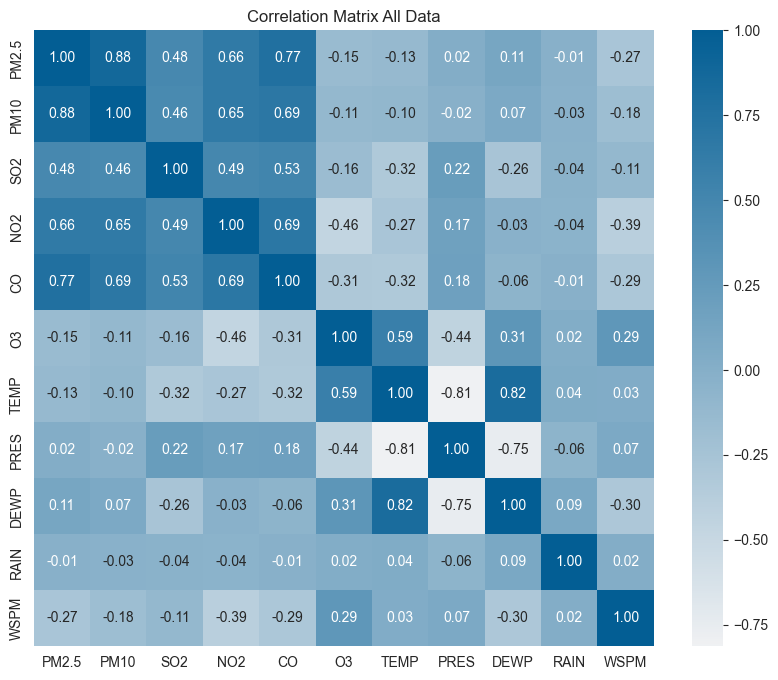

In [23]:
all_data = pd.concat(data.values(), ignore_index=True)

number_plot_corelation = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

correlation_matrix = all_data[number_plot_corelation].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=pal, fmt=".2f")
plt.title("Correlation Matrix All Data")
plt.show()

PM2.5, PM10, SO2, NO2, dan CO memiliki korelasi positif terbaik terhadap sesama, jadi akan menggunakan PCA untuk menganalisis secara keseluruhan untuk menjadi tolak ukur dari beberapa sudut pandang

In [24]:
all_data['PRES'].describe()

count    420768.000000
mean       1010.746341
std          10.469404
min         982.400000
25%        1002.300000
50%        1010.400000
75%        1019.000000
max        1042.800000
Name: PRES, dtype: float64

### 2.1) Features Kualitas, Wilayah, Waktu

2.1.1) Kualitas

In [25]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(all_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO']])

scaler = MinMaxScaler()
all_data['Kualitas'] = scaler.fit_transform(pca_result)

In [26]:
all_data['Kualitas'].describe()

count    420768.000000
mean          0.114456
std           0.114209
min           0.000000
25%           0.040539
50%           0.081335
75%           0.141305
max           1.000000
Name: Kualitas, dtype: float64

Persebaran data pada kualitas cenderung berada di rata rata 75% kebawah, jadi sebagian besar kualitas udara di berbagai wilayah tergolong baik

In [27]:
all_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO'] + ['Kualitas']].corr()

,PM2.5,PM10,SO2,NO2,CO,Kualitas
PM2.5,1.000000,0.879403,0.477780,0.658936,0.768866,0.772078
PM10,0.879403,1.000000,0.458736,0.646260,0.686963,0.690775
SO2,0.477780,0.458736,1.000000,0.492662,0.525420,0.526349
NO2,0.658936,0.646260,0.492662,1.000000,0.689799,0.691410
CO,0.768866,0.686963,0.525420,0.689799,1.000000,0.999985
Kualitas,0.772078,0.690775,0.526349,0.691410,0.999985,1.000000


Pada korelasi kualitas diatas memiliki korelasi positif, ketika kualitas meningkat maka akan meningkatkan beberapa features lain, sehingga nilai mendekati 1 artinya kulitas udara semakin buruk

2.1.2) Wilayah

In [28]:
all_data['PRES'].describe()

count    420768.000000
mean       1010.746341
std          10.469404
min         982.400000
25%        1002.300000
50%        1010.400000
75%        1019.000000
max        1042.800000
Name: PRES, dtype: float64

Karena tekanan udara (PRES) berpengaruh terhadap ketinggian wilayah maka kami akan membuat features untuk mengekplorasi lebih lanjut dengan membagi 50% mean dari data terhadap Station untuk membuat wilayah menjadi 2 golongan yaitu **Rendah** atau **Tinggi** 

In [29]:
all_data.groupby("station")[["PRES"]].mean().sort_values("PRES",ascending=False).head(15).reset_index()

,station,PRES
0,Shunyi,1013.061938
1,Dongsi,1012.547419
2,Tiantan,1012.547419
3,Nongzhanguan,1012.547419
4,Guanyuan,1011.846920
5,Aotizhongxin,1011.846920
6,Wanshouxigong,1011.511804
7,Wanliu,1011.097536
8,Gucheng,1008.829592
9,Changping,1007.760278


In [30]:
median_pressure = all_data.groupby('station')['PRES'].transform('mean').median()
all_data['Wilayah'] = all_data.groupby('station')['PRES'].transform('mean').apply(lambda x: 'Rendah' if x < median_pressure else 'Tinggi')

In [31]:
all_data.groupby('station')['Wilayah'].unique()

station
Aotizhongxin     [Tinggi]
Changping        [Rendah]
Dingling         [Rendah]
Dongsi           [Tinggi]
Guanyuan         [Tinggi]
Gucheng          [Rendah]
Huairou          [Rendah]
Nongzhanguan     [Tinggi]
Shunyi           [Tinggi]
Tiantan          [Tinggi]
Wanliu           [Rendah]
Wanshouxigong    [Rendah]
Name: Wilayah, dtype: object

2.1.3) Waktu

Saya membagi waktu dalam 3 kategori yaitu pagi, siang, dan malam

In [32]:
all_data['Waktu'] = np.where(all_data['hour'].isin([4,5, 6, 7, 8, 9, 10, 11]), 'Pagi',
                    np.where(all_data['hour'].isin([12, 13, 14, 15, 16, 17]), 'Siang', 'Malam'))


In [33]:
all_data[['hour', 'Waktu']].head(24)

,hour,Waktu
0,0,Malam
1,1,Malam
2,2,Malam
3,3,Malam
4,4,Pagi
5,5,Pagi
6,6,Pagi
7,7,Pagi
8,8,Pagi
9,9,Pagi


### 2.2) Explore Produktifitas

Waktu X Wilayah, bedasarkan polusi

Waktu

In [34]:
all_data.groupby("Waktu")[["PM10","PM2.5","SO2","NO2","CO","O3","Kualitas"]].mean().sort_values("Kualitas",ascending=False).head().reset_index()

,Waktu,PM10,PM2.5,SO2,NO2,CO,O3,Kualitas
0,Malam,114.549169,85.291373,15.051205,56.010488,1296.542818,53.770587,0.121161
1,Pagi,97.217096,76.093827,15.337678,51.121201,1275.456026,35.721265,0.118890
2,Siang,97.776113,75.510217,17.747154,40.820861,1060.987627,92.150942,0.097369


Wilayah

In [35]:
all_data.groupby("Wilayah")[["PM10","PM2.5","SO2","NO2","CO","O3","Kualitas"]].mean().sort_values("Kualitas",ascending=False).head().reset_index()

,Wilayah,PM10,PM2.5,SO2,NO2,CO,O3,Kualitas
0,Tinggi,107.252038,83.066046,16.687808,54.345934,1279.004358,56.513223,0.119348
1,Rendah,101.905057,76.494425,14.953559,46.820704,1182.245821,58.185247,0.109564


In [36]:
rendah_pagi = all_data.query('Wilayah == "Rendah" and Waktu == "Pagi"')
rendah_siang = all_data.query('Wilayah == "Rendah" and Waktu == "Siang"')
rendah_malam = all_data.query('Wilayah == "Rendah" and Waktu == "Malam"')
tinggi_pagi = all_data.query('Wilayah == "Tinggi" and Waktu == "Pagi"')
tinggi_siang = all_data.query('Wilayah == "Tinggi" and Waktu == "Siang"')
tinggi_malam = all_data.query('Wilayah == "Tinggi" and Waktu == "Malam"')

rendah_pagi_mean = rendah_pagi[["PM10","PM2.5","SO2","NO2","CO","O3","Kualitas"]].mean().to_frame().T
rendah_siang_mean = rendah_siang[["PM10","PM2.5","SO2","NO2","CO","O3","Kualitas"]].mean().to_frame().T
rendah_malam_mean = rendah_malam[["PM10","PM2.5","SO2","NO2","CO","O3","Kualitas"]].mean().to_frame().T
tinggi_pagi_mean = tinggi_pagi[["PM10","PM2.5","SO2","NO2","CO","O3","Kualitas"]].mean().to_frame().T
tinggi_siang_mean = tinggi_siang[["PM10","PM2.5","SO2","NO2","CO","O3","Kualitas"]].mean().to_frame().T
tinggi_malam_mean = tinggi_malam[["PM10","PM2.5","SO2","NO2","CO","O3","Kualitas"]].mean().to_frame().T

wilayahxwaktu = pd.concat([rendah_pagi_mean, rendah_siang_mean, rendah_malam_mean, tinggi_pagi_mean, tinggi_siang_mean, tinggi_malam_mean], ignore_index=True)
wilayahxwaktu.index = ["Rendah Pagi", "Rendah Siang", "Rendah Malam", "Tinggi Pagi", "Tinggi Siang", "Tinggi Malam"]

wilayahxwaktu

,PM10,PM2.5,SO2,NO2,CO,O3,Kualitas
Rendah Pagi,93.818406,72.273022,14.389750,46.751405,1222.377653,37.556461,0.113519
Rendah Siang,97.086831,73.734008,17.455122,39.093861,1027.727570,91.518331,0.094017
Rendah Malam,111.265312,81.527796,13.903668,51.512250,1242.851307,54.688426,0.115729
Tinggi Pagi,100.615787,79.914632,16.285605,55.490997,1328.534399,33.886070,0.124262
Tinggi Siang,98.465395,77.286426,18.039186,42.547862,1094.247685,92.783553,0.100721
Tinggi Malam,117.833026,89.054949,16.198742,60.508726,1350.234329,52.852748,0.126594


Tingkat polusi udara cenderung lebih tinggi pada waktu malam hari baik untuk wilayah rendah maupun tinggi dibandingkan dengan waktu pagi dan siang hari. sehingga mempengaruhi kualitas udara hal itu  disebabkan polusi yang terjebak dan tidak bisa terurai, disarankan untuk tidak terlalu beraktifitas dimalam hari

In [37]:
print(f"Daftar Wilayah\n", all_data.groupby('station')['Wilayah'].unique().reset_index())

Daftar Wilayah
           station   Wilayah
0    Aotizhongxin  [Tinggi]
1       Changping  [Rendah]
2        Dingling  [Rendah]
3          Dongsi  [Tinggi]
4        Guanyuan  [Tinggi]
5         Gucheng  [Rendah]
6         Huairou  [Rendah]
7    Nongzhanguan  [Tinggi]
8          Shunyi  [Tinggi]
9         Tiantan  [Tinggi]
10         Wanliu  [Rendah]
11  Wanshouxigong  [Rendah]


### 2.3) Station X Suhu

In [38]:
all_data.groupby("station")[["TEMP", "PM10", "Kualitas"]].mean().sort_values("TEMP", ascending=False).reset_index()

,station,TEMP,PM10,Kualitas
0,Gucheng,13.864524,118.861978,0.123928
1,Wanshouxigong,13.784477,112.223459,0.128552
2,Changping,13.686111,94.657871,0.106486
3,Dingling,13.686111,83.739723,0.081555
4,Nongzhanguan,13.671490,108.991096,0.123924
5,Dongsi,13.671490,110.336742,0.124503
6,Tiantan,13.671490,106.363672,0.121268
7,Aotizhongxin,13.584607,110.060391,0.117763
8,Guanyuan,13.584607,109.023303,0.118593
9,Wanliu,13.428865,110.464618,0.123438


Stasiun Gucheng menunjukkan tingkat PM10 rata-rata tertinggi (118.86 µg/m³), menandakan bahwa kualitas udara di stasiun tersebut sangat buruk. Suhu udara yang tinggi di wilayah ini juga mungkin mempengaruhi kualitas udara yang buruk. Di sisi lain, Stasiun Huairou menunjukkan kualitas udara yang baik dengan suhu udara yang rendah, menunjukkan hubungan antara suhu rendah dan kualitas udara yang baik di wilayah tersebut.

### 2.4) Explore Data Tahun

In [39]:
all_data.groupby("year")[["Kualitas", "PM10", "PM2.5", "SO2", "NO2", "CO", "O3"]].mean().sort_values("Kualitas",ascending=False).head().reset_index()

,year,Kualitas,PM10,PM2.5,SO2,NO2,CO,O3
0,2017,0.150728,111.059113,92.502930,18.108466,57.253897,1591.192606,40.185819
1,2015,0.117105,103.615074,79.628135,13.054381,48.305570,1257.188172,59.197334
2,2014,0.117094,115.844512,85.397667,20.693014,54.552918,1255.870434,58.237894
3,2013,0.112119,102.780319,80.004889,19.947477,52.252588,1207.321700,57.255940
4,2016,0.105291,94.762961,72.091085,9.901344,46.425161,1140.317107,57.464737


- Tahun 2017 mencatat kualitas udara terendah (Kualitas = 0.150728).
- Tahun 2016 menunjukkan kualitas udara tertinggi (Kualitas = 0.105291).

Konsentrasi PM10, PM2.5, SO2, dan NO2 menunjukkan kecenderungan peningkatan sepanjang periode 2013-2017. Kualitas udara yang buruk pada tahun 2017 disebabkan oleh tingginya konsentrasi PM10, PM2.5, NO2, dan CO. Hal ini menyebabkan tahun 2017 memiliki rata-rata kualitas udara yang lebih buruk dibandingkan dengan tahun-tahun sebelumnya.

## 3.) Visualization and Exploratory Analysis

### 3.1) Apakah perkembangan tren kualitas udara dari tahun 2013 s/d 2017 mengelami penurunan atau peningkatan?

In [40]:
pal = ["#FF0000", "#FFFF00", "#008000", "#FF0000", "#FFFF00", "#008000", "#FF0000", "#FFFF00", "#008000", "#FF0000", "#FFFF00", "#008000", "#FF0000", "#FFFF00", "#008000"]

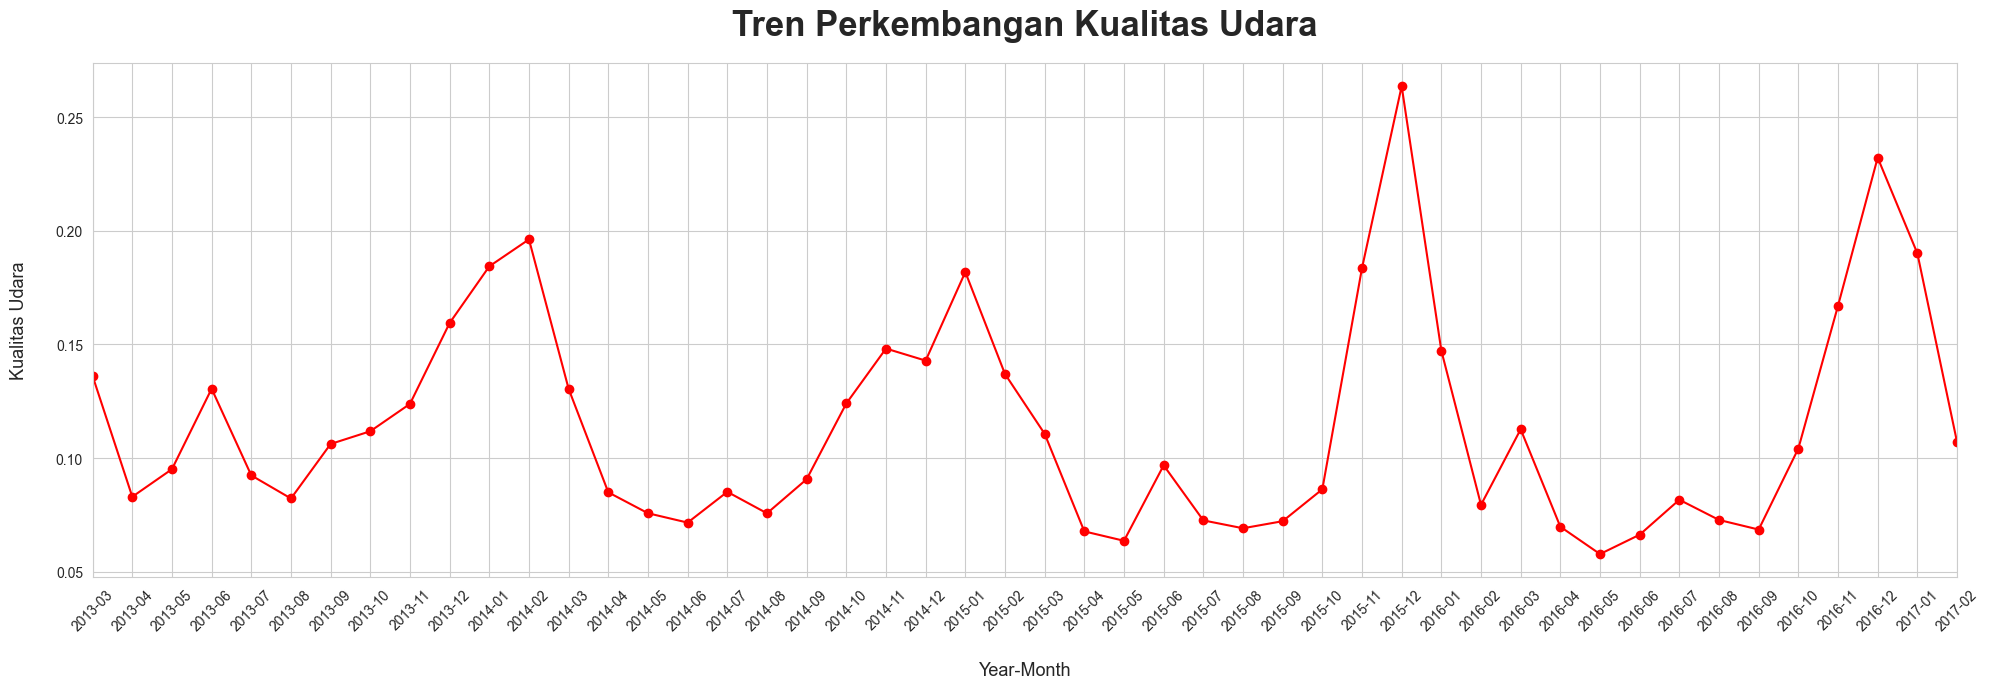

In [41]:
mean_kualitas = all_data.groupby(['year', 'month'])['Kualitas'].mean()
mean_kualitas.index = mean_kualitas.index.map(lambda x: f'{x[0]}-{x[1]:02d}')
plt.figure(figsize=(20, 7))
plt.plot(mean_kualitas.index, mean_kualitas.values, marker='o', linestyle='-', color="#FF0000")
plt.xlabel('Year-Month', labelpad=20, fontsize=13)
plt.ylabel('Kualitas Udara', labelpad=20, fontsize=13)
plt.title('Tren Perkembangan Kualitas Udara', fontsize=25, pad=20, fontweight='bold')
plt.xticks(rotation=45)
plt.xlim(mean_kualitas.index[0], mean_kualitas.index[-1])
plt.grid(True)
plt.tight_layout()
plt.show()

**Perkembangan Kualitas Udara: Pola dan Variabilitas**

Analisis data menunjukkan adanya penurunan kualitas udara dari Maret 2013 hingga Februari 2017, meskipun terdapat fluktuasi yang signifikan selama periode tersebut.

Bulan Desember 2015 mencuat sebagai periode dengan kualitas udara paling buruk di berbagai wilayah. Hal ini menyoroti perlunya investigasi lebih lanjut untuk memahami faktor-faktor yang mempengaruhi penurunan drastis kualitas udara pada bulan tersebut.

Di sisi lain, bulan Mei 2016 tercatat sebagai periode dengan kualitas udara terbaik. Hal ini menunjukkan bahwa upaya untuk meningkatkan kualitas udara dapat memberikan hasil yang positif.

Secara keseluruhan, data menunjukkan bahwa masih banyak pekerjaan yang harus dilakukan untuk mencapai tingkat kualitas udara yang optimal. Diperlukan upaya berkelanjutan dari berbagai pihak untuk mengatasi berbagai faktor yang menyebabkan pencemaran udara.

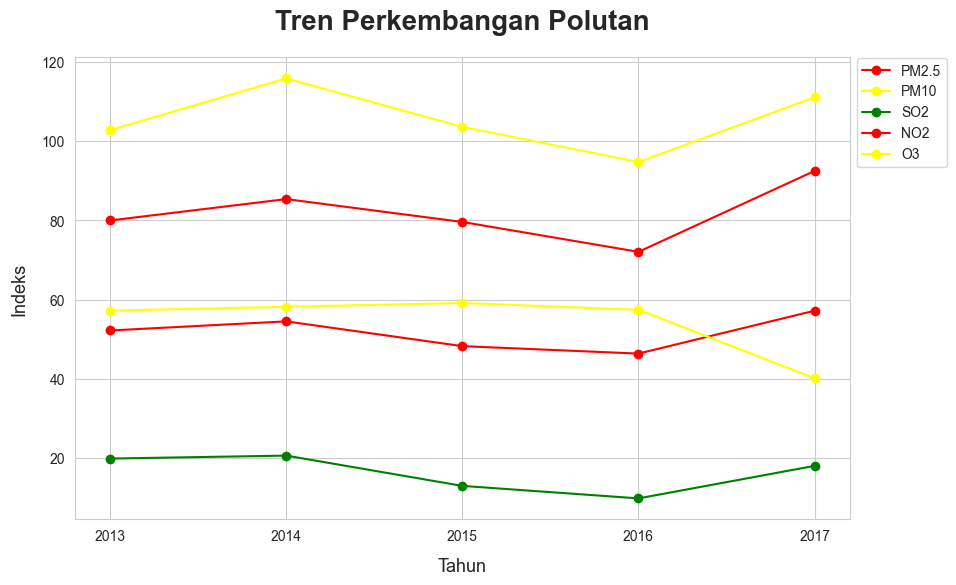

In [42]:
yearly_means = all_data.groupby("year")[["PM2.5", "PM10", "SO2", "NO2", "O3"]].mean()

plt.figure(figsize=(10, 6))
for i,feature in enumerate(yearly_means.columns):
    plt.plot(yearly_means.index, yearly_means[feature], label=feature, marker='o', color=pal[i])

plt.xlabel('Tahun', labelpad=10, fontsize=13)
plt.ylabel('Indeks', labelpad=10, fontsize=13)
plt.title('Tren Perkembangan Polutan', fontsize=20, pad=20, fontweight='bold')
plt.xticks(range(2013,2018))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.88))
plt.grid(True)
plt.show()

**Analisis Trend Polusi Udara (Maret 2013 - Februari 2017)**

Dari analisis data, terlihat bahwa rata-rata tingkat polutan udara menunjukkan variasi selama periode Maret 2013 hingga Februari 2017.
- PM10 dan PM2.5: Terjadi kenaikan rata-rata tingkat PM10 dan PM2.5, menunjukkan peningkatan risiko kesehatan masyarakat terhadap paparan partikel-partikel halus ini.
- O3: Rata-rata tingkat O3 mengalami penurunan, yang dapat berdampak negatif pada kesehatan manusia dan ekosistem.
- NO2: Rata-rata tingkat NO2 mengalami peningkatan, yang merupakan gas beracun yang dapat memperburuk penyakit pernapasan.
- SO2: Terjadi sedikit penurunan rata-rata tingkat SO2, menunjukkan adanya perbaikan dalam emisi sulfur dioksida.

### 3.2 Bagaimana dengan kualitas udara pada waktu malam hari apakah baik untuk beraktivitas?

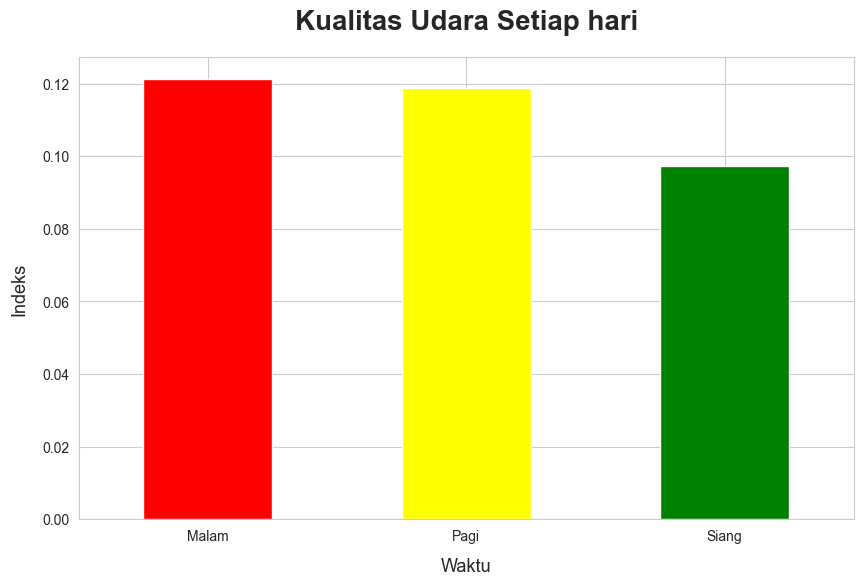

In [43]:
waktu_means = all_data.groupby("Waktu")["Kualitas"].mean()

waktu_means.plot(kind="bar", stacked=False, figsize=(10, 6),color=pal)
plt.xlabel('Waktu', labelpad=10, fontsize=13)
plt.ylabel('Indeks', labelpad=10, fontsize=13)
plt.title('Kualitas Udara Setiap hari', fontsize=20, pad=20, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Pada malam hari kualitas udara kurang baik, maka kuarangi untuk melakukan aktivitas dimalam hari.

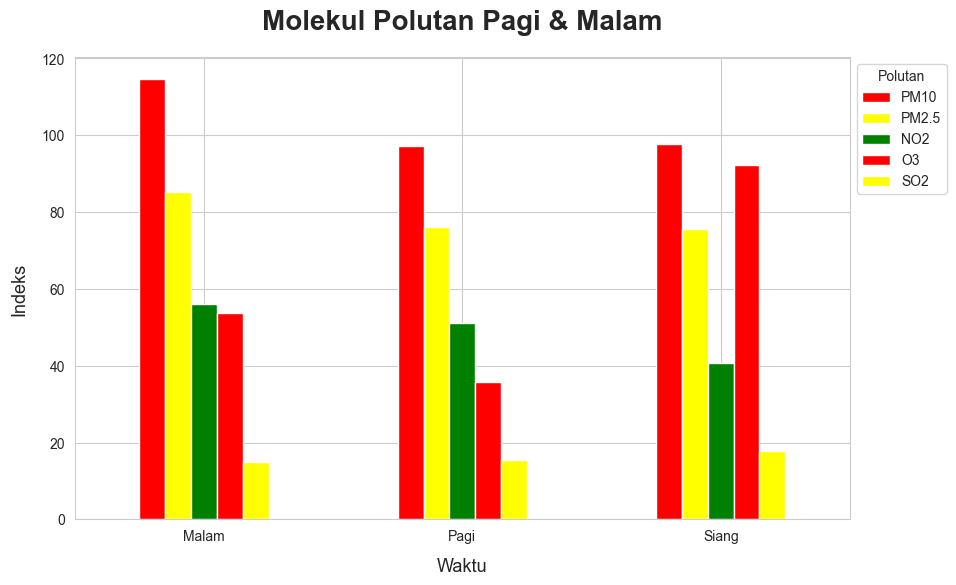

In [44]:
waktu_means = all_data.groupby("Waktu")[["PM10", "PM2.5", "NO2", "O3", "SO2"]].mean()

waktu_means.plot(kind="bar", stacked=False, figsize=(10, 6),color=pal)
plt.xlabel('Waktu', labelpad=10, fontsize=13)
plt.ylabel('Indeks', labelpad=10, fontsize=13)
plt.title('Molekul Polutan Pagi & Malam', fontsize=20, pad=20, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title="Polutan", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

**Kualitas Udara pada Malam Hari dan Rekomendasi Aktivitas**

Data menunjukkan bahwa kualitas udara cenderung lebih buruk pada malam hari dibandingkan pagi dan siang hari. Hal ini disebabkan oleh beberapa faktor, antara lain:

- Inversi Suhu: Pada malam hari, suhu udara di permukaan bumi lebih rendah dibandingkan dengan udara di atasnya, menyebabkan udara dingin terperangkap di permukaan dan menghambat dispersi polutan.
- Aktivitas Kendaraan: Aktivitas kendaraan umumnya berkurang pada malam hari, menyebabkan emisi kendaraan tertahan di sekitar permukaan bumi.
- Emisi Industri: Beberapa industri beroperasi pada malam hari dan emisi industri ini dapat berkontribusi pada penurunan kualitas udara.

Sebagai rekomendasi, disarankan untuk mengurangi aktivitas luar ruangan pada malam hari dan mengurangi penggunaan kendaraan bermotor untuk membantu mengurangi emisi polutan udara.

## Conclusion

Berdasarkan analisis data kualitas udara dari tahun 2013 hingga 2017, dapat ditarik kesimpulan sebagai berikut:

**Pertanyaan 1: Tren Kualitas Udara**

1. Secara umum, kualitas udara mengalami peningkatan buruk dari tahun 2013 hingga 2017.

2. Terdapat fluktuasi kualitas udara yang signifikan dalam periode tersebut, dengan bulan Desember 2015 sebagai bulan dengan kualitas udara terburuk dan Mei 2016 sebagai bulan terbaik.

**Pertanyaan 2: Kualitas Udara Malam Hari**

1. Pada malam hari, kualitas udara umumnya lebih buruk dibandingkan dengan pagi dan siang hari.

2. Hal ini disebabkan oleh beberapa faktor, seperti inversi suhu, berkurangnya aktivitas kendaraan, dan emisi industri.
Oleh karena itu, disarankan untuk tidak terlalu sering beraktivitas di luar ruangan pada malam hari, terutama bagi orang-orang yang memiliki masalah kesehatan pernapasan.
 
Kesimpulan:

KKualitas udara di berbagai daerah memerlukan perhatian serius dan tindakan berkelanjutan dari berbagai pihak untuk meningkatkannya. Upaya ini dapat dilakukan dengan berbagai cara, antara lain:
- Mengurangi emisi gas buang kendaraan dengan menerapkan standar emisi yang lebih ketat dan mendorong penggunaan kendaraan yang ramah lingkungan.
- Mengurangi emisi dari industri dengan menerapkan teknologi yang lebih bersih dan efisien.
- Meningkatkan kesadaran masyarakat tentang pentingnya menjaga kualitas udara dan mendorong mereka untuk berperilaku yang ramah lingkungan.
- Memberikan himbauan kepada masyarakat untuk mengurangi aktivitas di luar ruangan pada malam hari dan saat kualitas udara buruk untuk menghindari paparan terhadap polutan udara yang berbahaya bagi kesehatan.